<a href="https://colab.research.google.com/github/INVISIBLE-SAM/-Price-of-Agricultural-Commodities-in-India/blob/main/Price_of_Agricultural_Commodities_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshtanwar/current-daily-price-of-various-commodities-india")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/current-daily-price-of-various-commodities-india/versions/12


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

print('SETUP COMPLETE')

SETUP COMPLETE


In [10]:
import os
import pandas as pd

data_dir = "/root/.cache/kagglehub/datasets/anshtanwar/current-daily-price-of-various-commodities-india/versions/12"
# Get a list of files in the directory
files = os.listdir(data_dir)

# Assuming your CSV file is named 'data.csv', adjust if needed
csv_file = [f for f in files if f.endswith('.csv')][0]

# Construct the full path to the CSV file
file_path = os.path.join(data_dir, csv_file)

# Read the CSV file
df = pd.read_csv(file_path)

df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


Features of Dataset¶
1. -> State: The state in India where the market is located.
2. -> District: The district in India where the market is located.
1. -> Market: The name of the market.
1. -> Commodity: The name of the commodity.
1. -> Variety: The variety of the commodity.
1. -> Grade: The grade or quality of the commodity.
1. -> Min Price: (INR) The minimum wholesale price of the commodity on a given day, per quintal (100 kg).
1. -> Max Price: (INR) The maximum wholesale price of the commodity on a given day, per quintal (100 kg).
1. -> Modal Price: (INR) The most common or representative wholesale price of the commodity on a given day, per quintal (100 kg).

In [12]:
px.pie(df , 'State',title = 'Top states')

<Axes: xlabel='Grade', ylabel='count'>

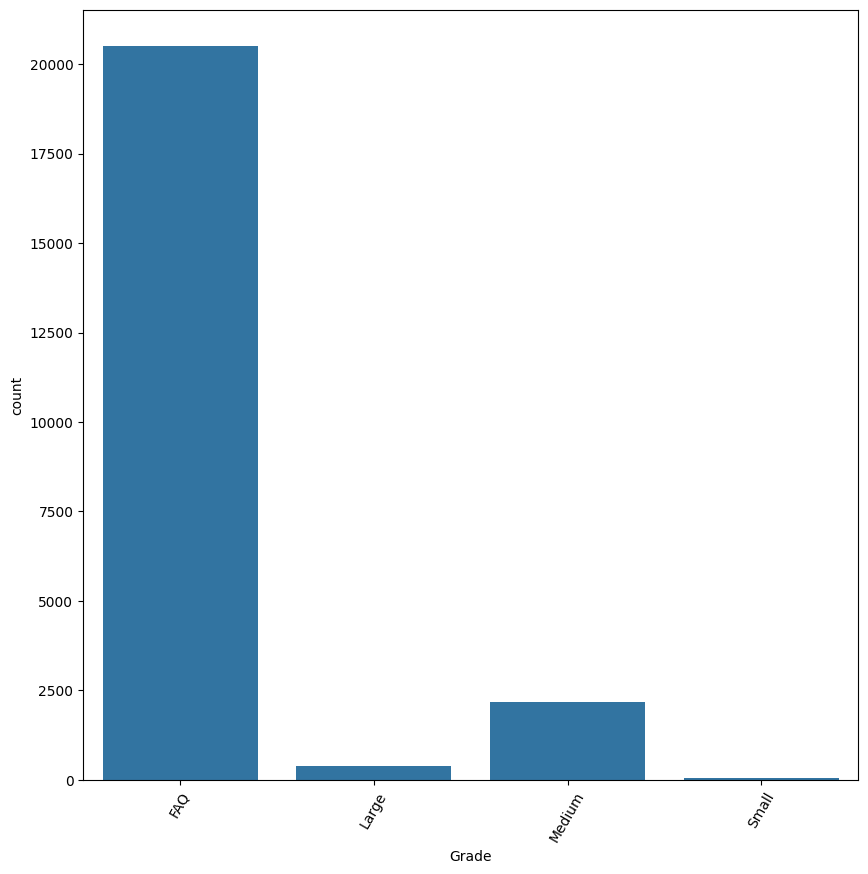

In [13]:
plt.figure(figsize = (10,10))

plt.xticks(rotation = 60)

sns.countplot(x = df['Grade'])

In [16]:
inputs_ = df[['State' , 'Min Price' , 'Max Price','Arrival_Date']]

target = df['Modal Price']

print("inputs shape " , inputs_.shape)
print("targets shape " , target.shape)
one_hot_encoded_data = pd.get_dummies(inputs_, columns = ['State'])
print(one_hot_encoded_data)
inputs = one_hot_encoded_data

inputs shape  (23093, 4)
targets shape  (23093,)
       Min Price  Max Price Arrival_Date  State_Andaman and Nicobar  \
0         4100.0     4500.0   27-07-2023                      False   
1         2200.0     3000.0   27-07-2023                      False   
2         2350.0     3000.0   27-07-2023                      False   
3         7000.0     7500.0   27-07-2023                      False   
4         8400.0     9000.0   27-07-2023                      False   
...          ...        ...          ...                        ...   
23088      800.0     1200.0   02-08-2023                      False   
23089     1500.0     2500.0   02-08-2023                      False   
23090     2000.0     3000.0   02-08-2023                      False   
23091      900.0     1800.0   02-08-2023                      False   
23092      500.0      700.0   02-08-2023                      False   

       State_Andhra Pradesh  State_Bihar  State_Chandigarh  State_Chattisgarh  \
0                

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Assuming 'inputs' and 'target' are defined from the previous code

# Convert 'Arrival_Date' to datetime objects and extract numerical features
# If 'Arrival_Date' is not already in datetime format, you might need to use pd.to_datetime()
inputs['Arrival_Date'] = pd.to_datetime(inputs['Arrival_Date'])
inputs['Arrival_Day'] = inputs['Arrival_Date'].dt.day
inputs['Arrival_Month'] = inputs['Arrival_Date'].dt.month
inputs['Arrival_Year'] = inputs['Arrival_Date'].dt.year

# Drop the original 'Arrival_Date' column
inputs = inputs.drop('Arrival_Date', axis=1)

# Feature scaling
scaler = MinMaxScaler()
# Select only numerical features for scaling
numerical_features = inputs.select_dtypes(include=['number']).columns
inputs_scaled = scaler.fit_transform(inputs[numerical_features])
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Split data into training and testing sets
# Assuming you want to keep the one-hot encoded state features:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, target_scaled, test_size=0.2, random_state=42)


# Reshape input data for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the bidirectional LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to get original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)


print("Predictions:", y_pred_original)

<ipython-input-18-5f073c57b6c0>:9: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.3209e-04 - val_loss: 5.0514e-06
Epoch 2/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.4107e-06 - val_loss: 4.5724e-06
Epoch 3/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.5998e-05 - val_loss: 5.4678e-06
Epoch 4/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.0656e-05 - val_loss: 5.7924e-06
Epoch 5/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.6060e-06 - val_loss: 6.1071e-06
Epoch 6/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.0404e-06 - val_loss: 8.9879e-06
Epoch 7/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.3640e-06 - val_loss: 5.6028e-06
Epoch 8/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 8.2699e-06 - val_loss: 5.9957e-06
Epoch 9/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.1289e-05 - val_loss: 5.0710e-06
Epoch 10/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.2501e-06 - val_loss: 2.3968e-05
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Predictions: [[ 6

In [19]:
# prompt: use rsquare,rmse metrics on prediction

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test_original, y_pred_original)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"RMSE: {rmse}")

R-squared: 0.9605553371361818
RMSE: 1103.968478282025


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
grade_mapping = {'low': 1, 'medium': 2, 'high': 3, 'FAQ' : 4}
df['Grade'] = df['Grade'].map(grade_mapping)
X = df[['Min Price', 'Max Price', 'Grade']]
y = df['Modal Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Transforming Data

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
#Linear Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
#Decision Tree Regressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)
#Forest Model

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)
#Gradient Boost Regressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
#Support Vector

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
#Printing R-Squared

print('Linear Regression - R-squared:', linear_r2)
print('Decision Tree Regression - R-squared:', tree_r2)
print('Random Forest Regression - R-squared:', forest_r2)
print('Gradient Boosting Regression - R-squared:', gb_r2)
print('Support Vector Regression (SVR) - R-squared:', svr_r2)

Linear Regression - R-squared: 0.9926364016822342
Decision Tree Regression - R-squared: 0.9930360738558044
Random Forest Regression - R-squared: 0.9935227774139802
Gradient Boosting Regression - R-squared: 0.9942490605996749
Support Vector Regression (SVR) - R-squared: 0.253797397905867
